## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0   2.921676   517.527635  0.084734   4.935255  1.429337
1  28.482998   247.099536  0.473127   8.494006  1.398289
2  68.899028  1230.498909  0.338466   8.387997  1.582788
3  76.558982   243.242585  0.984901   6.523299  1.271229
4  24.253395   937.767492  0.236549  10.896620  1.359615


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8957784	total: 69.6ms	remaining: 1m 9s
1:	learn: 0.8877540	total: 70.1ms	remaining: 35s
2:	learn: 0.8795659	total: 70.7ms	remaining: 23.5s
3:	learn: 0.8715871	total: 71.3ms	remaining: 17.8s
4:	learn: 0.8637654	total: 71.8ms	remaining: 14.3s
5:	learn: 0.8581155	total: 72.3ms	remaining: 12s
6:	learn: 0.8516989	total: 72.8ms	remaining: 10.3s
7:	learn: 0.8439172	total: 73.4ms	remaining: 9.1s
8:	learn: 0.8358746	total: 73.9ms	remaining: 8.13s
9:	learn: 0.8275516	total: 74.3ms	remaining: 7.36s
10:	learn: 0.8186642	total: 74.8ms	remaining: 6.73s
11:	learn: 0.8095315	total: 75.4ms	remaining: 6.21s
12:	learn: 0.8029175	total: 76ms	remaining: 5.77s
13:	learn: 0.7955006	total: 76.3ms	remaining: 5.37s
14:	learn: 0.7873578	total: 76.8ms	remaining: 5.04s
15:	learn: 0.7805551	total: 77.2ms	remaining: 4.75s
16:	learn: 0.7733808	total: 77.6ms	remaining: 4.49s
17:	learn: 0.7669560	total: 78ms	remaining: 4.25s
18:	learn: 0.7614062	total: 78.4ms	remaining: 4.05s
1

111:	learn: 0.3955932	total: 118ms	remaining: 939ms
112:	learn: 0.3928480	total: 119ms	remaining: 934ms
113:	learn: 0.3903784	total: 119ms	remaining: 928ms
114:	learn: 0.3882237	total: 120ms	remaining: 922ms
115:	learn: 0.3857993	total: 120ms	remaining: 916ms
116:	learn: 0.3835601	total: 120ms	remaining: 909ms
117:	learn: 0.3807166	total: 121ms	remaining: 903ms
118:	learn: 0.3780770	total: 121ms	remaining: 898ms
119:	learn: 0.3761532	total: 122ms	remaining: 893ms
120:	learn: 0.3736808	total: 122ms	remaining: 888ms
121:	learn: 0.3710475	total: 123ms	remaining: 883ms
122:	learn: 0.3691808	total: 123ms	remaining: 877ms
123:	learn: 0.3671138	total: 124ms	remaining: 873ms
124:	learn: 0.3653779	total: 124ms	remaining: 867ms
125:	learn: 0.3640993	total: 124ms	remaining: 862ms
126:	learn: 0.3623032	total: 125ms	remaining: 857ms
127:	learn: 0.3605434	total: 125ms	remaining: 852ms
128:	learn: 0.3583907	total: 125ms	remaining: 847ms
129:	learn: 0.3570270	total: 126ms	remaining: 843ms
130:	learn: 

267:	learn: 0.1976577	total: 186ms	remaining: 508ms
268:	learn: 0.1965131	total: 186ms	remaining: 507ms
269:	learn: 0.1956327	total: 187ms	remaining: 505ms
270:	learn: 0.1942786	total: 187ms	remaining: 504ms
271:	learn: 0.1932987	total: 188ms	remaining: 503ms
272:	learn: 0.1922665	total: 188ms	remaining: 501ms
273:	learn: 0.1911867	total: 189ms	remaining: 500ms
274:	learn: 0.1901192	total: 189ms	remaining: 498ms
275:	learn: 0.1893545	total: 189ms	remaining: 497ms
276:	learn: 0.1889100	total: 190ms	remaining: 495ms
277:	learn: 0.1884032	total: 190ms	remaining: 494ms
278:	learn: 0.1873544	total: 190ms	remaining: 492ms
279:	learn: 0.1863568	total: 191ms	remaining: 491ms
280:	learn: 0.1859068	total: 191ms	remaining: 489ms
281:	learn: 0.1854431	total: 192ms	remaining: 488ms
282:	learn: 0.1848764	total: 192ms	remaining: 486ms
283:	learn: 0.1839185	total: 193ms	remaining: 485ms
284:	learn: 0.1834145	total: 193ms	remaining: 484ms
285:	learn: 0.1829363	total: 193ms	remaining: 483ms
286:	learn: 

525:	learn: 0.0853943	total: 300ms	remaining: 270ms
526:	learn: 0.0849901	total: 300ms	remaining: 270ms
527:	learn: 0.0847700	total: 301ms	remaining: 269ms
528:	learn: 0.0844425	total: 301ms	remaining: 268ms
529:	learn: 0.0843361	total: 302ms	remaining: 267ms
530:	learn: 0.0839418	total: 302ms	remaining: 267ms
531:	learn: 0.0839064	total: 302ms	remaining: 266ms
532:	learn: 0.0838715	total: 303ms	remaining: 265ms
533:	learn: 0.0837466	total: 303ms	remaining: 264ms
534:	learn: 0.0833618	total: 303ms	remaining: 264ms
535:	learn: 0.0830430	total: 304ms	remaining: 263ms
536:	learn: 0.0830084	total: 304ms	remaining: 262ms
537:	learn: 0.0828648	total: 305ms	remaining: 261ms
538:	learn: 0.0827236	total: 305ms	remaining: 261ms
539:	learn: 0.0826183	total: 305ms	remaining: 260ms
540:	learn: 0.0825156	total: 306ms	remaining: 259ms
541:	learn: 0.0822044	total: 306ms	remaining: 259ms
542:	learn: 0.0818312	total: 307ms	remaining: 258ms
543:	learn: 0.0817909	total: 307ms	remaining: 257ms
544:	learn: 

676:	learn: 0.0632178	total: 368ms	remaining: 175ms
677:	learn: 0.0630219	total: 368ms	remaining: 175ms
678:	learn: 0.0626919	total: 369ms	remaining: 174ms
679:	learn: 0.0624198	total: 369ms	remaining: 174ms
680:	learn: 0.0623208	total: 369ms	remaining: 173ms
681:	learn: 0.0620560	total: 370ms	remaining: 173ms
682:	learn: 0.0618637	total: 370ms	remaining: 172ms
683:	learn: 0.0616577	total: 371ms	remaining: 171ms
684:	learn: 0.0614571	total: 372ms	remaining: 171ms
685:	learn: 0.0612618	total: 372ms	remaining: 170ms
686:	learn: 0.0611692	total: 372ms	remaining: 170ms
687:	learn: 0.0610583	total: 373ms	remaining: 169ms
688:	learn: 0.0607394	total: 373ms	remaining: 168ms
689:	learn: 0.0605497	total: 374ms	remaining: 168ms
690:	learn: 0.0604594	total: 374ms	remaining: 167ms
691:	learn: 0.0601470	total: 375ms	remaining: 167ms
692:	learn: 0.0600390	total: 375ms	remaining: 166ms
693:	learn: 0.0599619	total: 376ms	remaining: 166ms
694:	learn: 0.0596558	total: 376ms	remaining: 165ms
695:	learn: 

937:	learn: 0.0319582	total: 482ms	remaining: 31.8ms
938:	learn: 0.0318986	total: 482ms	remaining: 31.3ms
939:	learn: 0.0318403	total: 483ms	remaining: 30.8ms
940:	learn: 0.0317989	total: 483ms	remaining: 30.3ms
941:	learn: 0.0317559	total: 484ms	remaining: 29.8ms
942:	learn: 0.0317119	total: 484ms	remaining: 29.3ms
943:	learn: 0.0316695	total: 484ms	remaining: 28.7ms
944:	learn: 0.0316266	total: 485ms	remaining: 28.2ms
945:	learn: 0.0315835	total: 485ms	remaining: 27.7ms
946:	learn: 0.0315415	total: 485ms	remaining: 27.2ms
947:	learn: 0.0315001	total: 486ms	remaining: 26.6ms
948:	learn: 0.0314510	total: 486ms	remaining: 26.1ms
949:	learn: 0.0314161	total: 487ms	remaining: 25.6ms
950:	learn: 0.0312992	total: 487ms	remaining: 25.1ms
951:	learn: 0.0312574	total: 487ms	remaining: 24.6ms
952:	learn: 0.0312146	total: 488ms	remaining: 24.1ms
953:	learn: 0.0310789	total: 488ms	remaining: 23.5ms
954:	learn: 0.0310314	total: 489ms	remaining: 23ms
955:	learn: 0.0309469	total: 489ms	remaining: 22

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


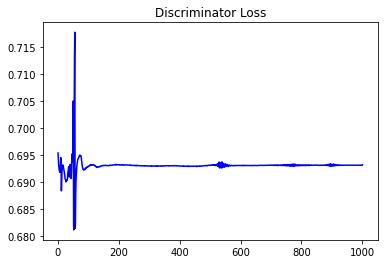

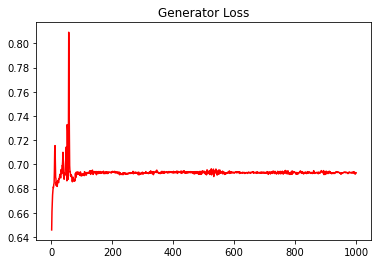

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5426348182129803


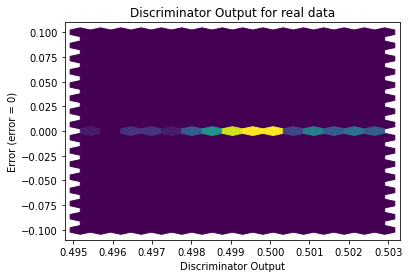

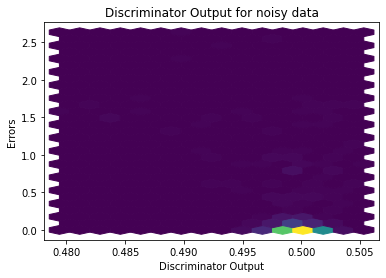

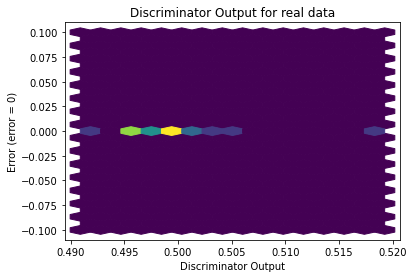

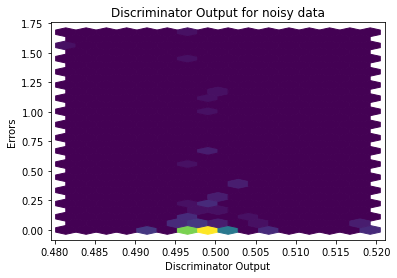

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0774]], requires_grad=True)
